# We're going to compare the two binning methods for all of our galaxies.

Let's import all the necessary modules and then make a list of usable FITS file paths 

In [46]:
from new_Galaxy import SpiralGalaxy as SG1
from newer_Galaxy import SpiralGalaxy as SG2

In [47]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [48]:
plt.style.use('seaborn')
plt.style.use('seaborn-colorblind')

In [49]:
usable_paths = np.load('usable_path_list.npy')[::4]

In [50]:
len(usable_paths)

39

Let us now compare both the binning methods.

In [51]:
gal_list1 = []

for path in usable_paths:
    gal_list1.append(SG1(path))
    
    
gal_list2 = []

for path in usable_paths:
    gal_list2.append(SG2(path))

/homes/sshamsi/.local/lib/python3.5/site-packages/marvin/tools/maps.py:272: MarvinUserWarning: mismatch between file version=DR15 and object release=MPL-7. Setting object release to DR15
  marvin.core.exceptions.MarvinUserWarning)


In [52]:
for gal in gal_list1:
    gal.form_global_df()
    
for gal in gal_list2:
    gal.form_global_df()

/raid5/homes/sshamsi/galaxy_zoo/GZ3D_spiral_analysis/new_Galaxy.py:134: RuntimeWarning: invalid value encountered in double_scalars
  x['SFR'] = (self.delta * (ha_flux**3.36) * (hb_flux**-2.36)) / self.spax_area


In [53]:
for gal in gal_list1:
    map_ha = gal.maps.getMap('emline_gflux', channel='ha_6564')
    map_hb = gal.maps.getMap('emline_gflux', channel='hb_4862')

    ha_snr = map_ha.snr.flatten()
    hb_snr = map_hb.snr.flatten()

    gal.df['S/N $H_{\\alpha}$'] = ha_snr
    gal.df['S/N $H_{\\beta}$'] = hb_snr

In [54]:
for gal in gal_list2:
    map_ha = gal.maps.getMap('emline_gflux', channel='ha_6564')
    map_hb = gal.maps.getMap('emline_gflux', channel='hb_4862')

    ha_snr = map_ha.snr.flatten()
    hb_snr = map_hb.snr.flatten()

    gal.df['S/N $H_{\\alpha}$'] = ha_snr
    gal.df['S/N $H_{\\beta}$'] = hb_snr

In [55]:
avg_sfr1 = []
avg_sfr_stdv1 = []

avg_sfr_spiral1 = []
avg_sfr_stdv_spiral1 = []

avg_sfr_nspiral1 = []
avg_sfr_stdv_nspiral1 = []

for gal in gal_list1:
    df = gal.df
    
    df = df.dropna()
    df = df[(df['$r/r_e$'] <= 1) & (df['$r/r_e$'] >= 0.1)]
    df = df[(df.Comp == 0) & (df.AGN == 0) & (df.Seyfert == 0) & (df.Liner == 0)]
    df = df[(df['S/N $H_{\\alpha}$'] >= 3) & (df['S/N $H_{\\beta}$'] >= 3)]
    
    df_spiral = df[df['Spiral Arm'] == 1]
    df_nspiral = df[df['Spiral Arm'] == 0]
    
    sfr = df.SFR.mean()
    sfr_stdv = np.sqrt(gal.get_var(df.index, mode='sfr', avg=True))
    
    sfr_spiral = df_spiral.SFR.mean()
    sfr_stdv_spiral = np.sqrt(gal.get_var(df_spiral.index, mode='sfr', avg=True))
    
    sfr_nspiral = df_nspiral.SFR.mean()
    sfr_stdv_nspiral = np.sqrt(gal.get_var(df_nspiral.index, mode='sfr', avg=True))
    
    avg_sfr1.append(sfr)
    avg_sfr_stdv1.append(sfr_stdv)
    
    avg_sfr_spiral1.append(sfr_spiral)
    avg_sfr_stdv_spiral1.append(sfr_stdv_spiral)

    avg_sfr_nspiral1.append(sfr_nspiral)
    avg_sfr_stdv_nspiral1.append(sfr_stdv_nspiral)

In [56]:
avg_sfr2 = []
avg_sfr_stdv2 = []

avg_sfr_spiral2 = []
avg_sfr_stdv_spiral2 = []

avg_sfr_nspiral2 = []
avg_sfr_stdv_nspiral2 = []

for gal in gal_list2:
    df = gal.df
    
    df = df.dropna()
    df = df[(df['$r/r_e$'] <= 1) & (df['$r/r_e$'] >= 0.1)]
    df = df[(df.Comp == 0) & (df.AGN == 0) & (df.Seyfert == 0) & (df.Liner == 0)]
    df = df[(df['S/N $H_{\\alpha}$'] >= 3) & (df['S/N $H_{\\beta}$'] >= 3)]
    
    df_spiral = df[df['Spiral Arm'] == 1]
    df_nspiral = df[df['Spiral Arm'] == 0]
    
    sfr, sfr_stdv = gal.get_sfr(df.index, avg=True)
    sfr_spiral, sfr_stdv_spiral = gal.get_sfr(df_spiral.index, avg=True)
    sfr_nspiral, sfr_stdv_nspiral = gal.get_sfr(df_nspiral.index, avg=True)
    
    avg_sfr2.append(sfr)
    avg_sfr_stdv2.append(sfr_stdv)
    
    avg_sfr_spiral2.append(sfr_spiral)
    avg_sfr_stdv_spiral2.append(sfr_stdv_spiral)

    avg_sfr_nspiral2.append(sfr_nspiral)
    avg_sfr_stdv_nspiral2.append(sfr_stdv_nspiral)

/raid5/homes/sshamsi/galaxy_zoo/GZ3D_spiral_analysis/newer_Galaxy.py:246: RuntimeWarning: invalid value encountered in double_scalars
  return summ / n, np.sqrt(var / (n**2))


In [57]:
x_array = np.arange(len(usable_paths))

In [58]:
diff_sfr = np.subtract(avg_sfr1, avg_sfr2)
diff_sfr_spiral = np.subtract(avg_sfr_spiral1, avg_sfr_spiral2)
diff_sfr_nspiral = np.subtract(avg_sfr_nspiral1, avg_sfr_nspiral2)

In [59]:
diff_sfr_stdv = np.subtract(avg_sfr_stdv1, avg_sfr_stdv2)
diff_sfr_stdv_spiral = np.subtract(avg_sfr_stdv_spiral1, avg_sfr_stdv_spiral2)
diff_sfr_stdv_nspiral = np.subtract(avg_sfr_stdv_nspiral1, avg_sfr_stdv_nspiral2)

In [60]:
def err_touples(errs):
    loerrs = []
    hierrs = []
    
    for err in errs:
        if err < 0:
            loerrs.append(abs(err))
            hierrs.append(0)
        else:
            loerrs.append(0)
            hierrs.append(abs(err))
            
    loerrs = tuple(loerrs)
    hierrs = tuple(hierrs)
    
    return [loerrs, hierrs]

In [61]:
diff_sfr_stdvt = err_touples(diff_sfr_stdv)
diff_sfr_stdv_spiralt = err_touples(diff_sfr_stdv_spiral)
diff_sfr_stdv_nspiralt = err_touples(diff_sfr_stdv_nspiral)

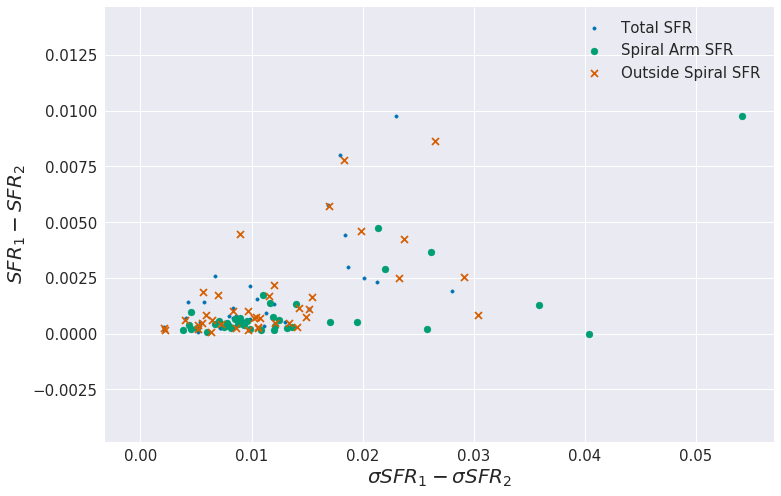

In [62]:
plt.figure(figsize=(12,8))

plt.scatter(diff_sfr_stdv, diff_sfr, marker='.', label='Total SFR')
plt.scatter(diff_sfr_stdv_spiral, diff_sfr_spiral, marker='o', label='Spiral Arm SFR')
plt.scatter(diff_sfr_stdv_nspiral, diff_sfr_nspiral, marker='x', label='Outside Spiral SFR')

plt.xlabel(r'$\sigma SFR_1 - \sigma SFR_2$', size=20)
plt.ylabel(r'$SFR_1 - SFR_2$', size=20)

plt.xticks(size=15)
plt.yticks(size=15)

plt.legend(fontsize=15)

In [30]:
diff_sfr_stdv_spiral[14]

nan

array([0.01428248, 0.0022302 , 0.01694529, 0.01022542, 0.00860988,
       0.00521124, 0.00590206, 0.00638783, 0.01058034, 0.00697675,
       0.00965845, 0.02909215, 0.0021563 , 0.00831575, 0.01517158,
       0.01212034, 0.01828541, 0.03035253, 0.01039147, 0.00647698])

In [29]:
l1 = [1,2,3,4]
l2 = [-1, 6, 7, 0]

In [30]:
np.subtract(l1, l2)

array([ 2, -4, -4,  4])

In [33]:
fo0 = (1, 2, 5, 6, 7, -9)

In [35]:
type(fo0)

tuple

In [121]:
avg_s2n = []

for gal in gal_list1:
    df = gal.df.dropna()
    df = df[(df['$r/r_e$'] <= 1) & (df['$r/r_e$'] >= 0.1)]
    df = df[(df.Comp == 0) & (df.AGN == 0) & (df.Seyfert == 0) & (df.Liner == 0)]
    df = df[(df['S/N $H_{\\alpha}$'] >= 3) & (df['S/N $H_{\\beta}$'] >= 3)]
    
    s2n = df['S/N $H_{\\alpha}$'].mean()
    avg_s2n.append(s2n)

In [122]:
avg_s2n = np.array(avg_s2n)

In [123]:
np.argsort(diff_sfr_stdv)

array([33, 28, 34, 13, 22, 31, 27, 23, 16, 14,  6,  4, 11, 21, 20, 30,  5,
       35, 29, 32,  0, 26,  9, 17, 37, 25, 10,  3, 36,  8, 19, 18, 12, 15,
       38, 24,  2,  7,  1])

In [124]:
avg_s2n_sorted = avg_s2n[np.argsort(diff_sfr_stdv)]

In [125]:
avg_s2n_sorted

array([ 12.249993,  65.06142 ,  29.938967,  15.953802, 207.2972  ,
       424.01974 , 150.64845 , 147.82632 ,  95.68584 ,  72.07729 ,
        58.94358 , 211.30635 ,  53.4173  ,  92.86558 , 104.56988 ,
       123.6296  , 101.205956,  63.01643 ,  47.862503,  89.83793 ,
        37.200314,  22.872442,  67.203156,  93.99104 ,  86.77586 ,
        42.843445,  74.208755,  76.93641 ,  26.596018, 115.7586  ,
        79.52919 ,  76.164986,  45.17286 ,  34.21058 ,  28.138796,
        28.850674,  40.87394 ,  49.01407 ,  57.442898], dtype=float32)

Text(0, 0.5, 'S/N $H_{\\alpha}$')

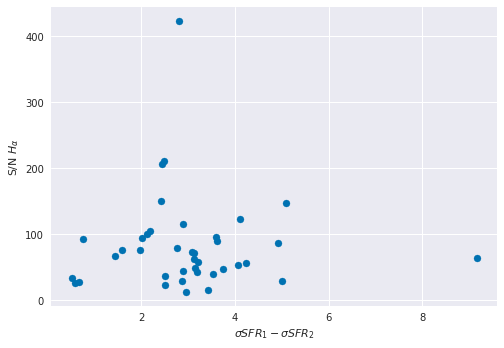

In [129]:
plt.scatter(diff_sfr_stdv, avg_s2n_sorted)
plt.xlabel('$\sigma SFR_1 - \sigma SFR_2$')
plt.ylabel('S/N $H_{\\alpha}$')

In [32]:
avg_sfr_spiral2[14]

nan

In [33]:
avg_sfr_spiral2[14]

nan

In [34]:
foo = gal_list1[14].df

In [40]:
foo[(foo['Spiral Arm'] == 1) & (foo['$r/r_e$'] < 1.2)]

,Radius,$H_{\alpha}$,$\sigma H_{\alpha}$,$H_{\beta}$,$\sigma H_{\beta}$,Comp,AGN,Seyfert,Liner,SFR,$\sigma$SFR,$r/r_e$,Spiral Arm,S/N $H_{\alpha}$,S/N $H_{\beta}$
1697,9.571346,1.346869,0.048227,0.252203,0.034770,0.0,0.0,0.0,0.0,0.009998,0.003468,1.093678,True,27.927942,7.253362
1766,9.796820,1.520246,0.041626,0.359849,0.032927,0.0,0.0,0.0,0.0,0.006491,0.001524,1.119442,True,36.521412,10.928587
1767,10.434542,1.559066,0.037422,0.306837,0.028148,0.0,0.0,0.0,0.0,0.010291,0.002378,1.192312,True,41.661259,10.900749


(<Figure size 576x396 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f190a0f03c8>)

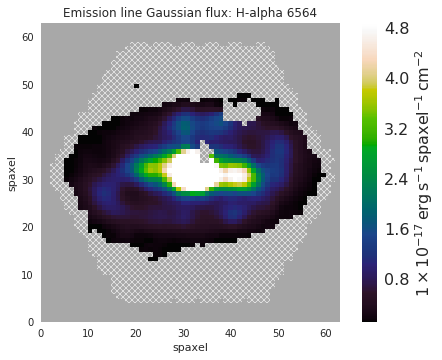

In [38]:
gal_list1[14].hamap.plot()

In [41]:
gal = gal_list2[14]

In [42]:
gal.arms_spaxel_mask = gal.data.spiral_mask_spaxel > 3
gal.bar_spaxel_mask = gal.data.bar_mask_spaxel > 3

In [43]:
common_spaxels = np.bitwise_and(gal.arms_spaxel_mask, gal.bar_spaxel_mask)
spiral_mask = np.bitwise_and(gal.arms_spaxel_mask, ~common_spaxels)

In [44]:
spiral_mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

(<Figure size 576x396 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f18a1483ef0>)

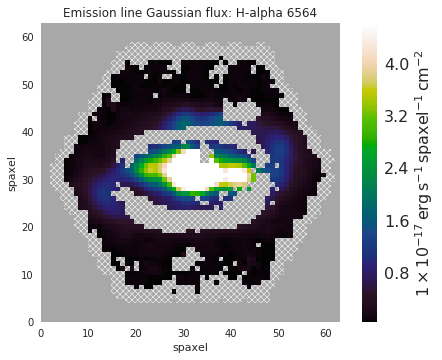

In [45]:
gal_list1[14].hamap.plot(mask=spiral_mask)